# Process Mining

We will use the `pm4py` package to perform process discovery - using an event log to discover the shape of the underlying process.

Consider the case where you have collected an event stream from an operation, and you want to map out the underlying 

You can use this [Medium Article](https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-2-4cf57053421f) as a reference tutorial.

Full `pm4py` docs are here: https://pm4py.fit.fraunhofer.de/docs

In [ ]:
#### Run this cell to install pm4py before running the rest of the notebook if you are using Google Colab
!pip install pm4py

In [1]:
import pm4py
import pandas as pd

In [2]:
df = pd.read_csv('event_log.csv')
df.head()

,Case_ID,Activity,Timestamp
0,folded_card_ca2df25f-2983-432d-8b15-7877e2879020,folding_station,42.025244
1,Order 0_64dfce2a-bb6e-421d-9f80-4ae6d5bcaf29,stapler,50.981305
2,folded_card_32c93c99-4969-4efe-90fc-e7398e487f81,folding_station,89.501707
3,Order 1_6cb680b8-657d-40f1-8e81-af8f44a5154a,stapler,97.078024
4,Order 3_27feace1-19ee-42e5-b95f-87380c9386fd,scissors,98.686582


Since pm4py wants the timestamp column to be timestamps, we must first convert the `Timestamp` column into a datetime format:

In [3]:
df['timestamp_time'] = df.Timestamp.map(lambda x: pd.to_datetime('2023-10-12 09:00') + pd.to_timedelta(x,'seconds'))

In [4]:
df = pm4py.format_dataframe(df,case_id='Case_ID',activity_key='Activity',timestamp_key='timestamp_time')
#event_log = pm4py.convert_to_event_log(df)

c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expe

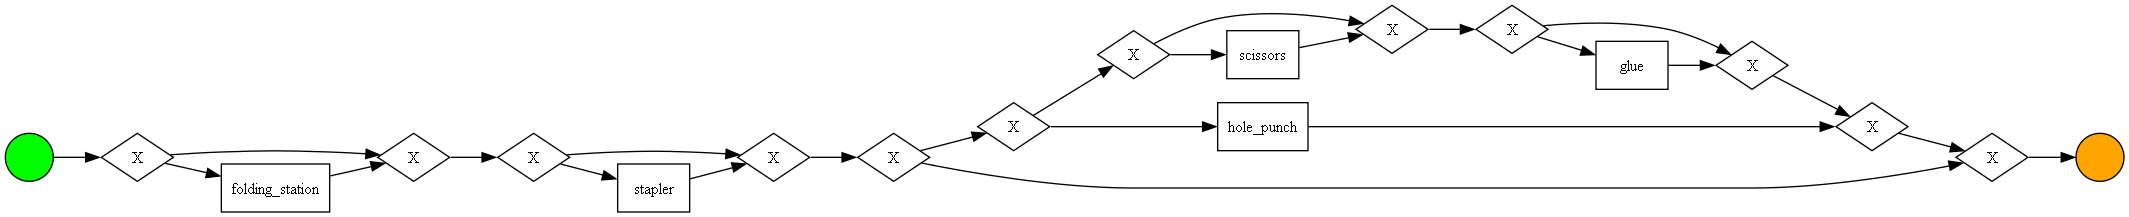

In [7]:
process_tree = pm4py.discover_process_tree_inductive(df)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

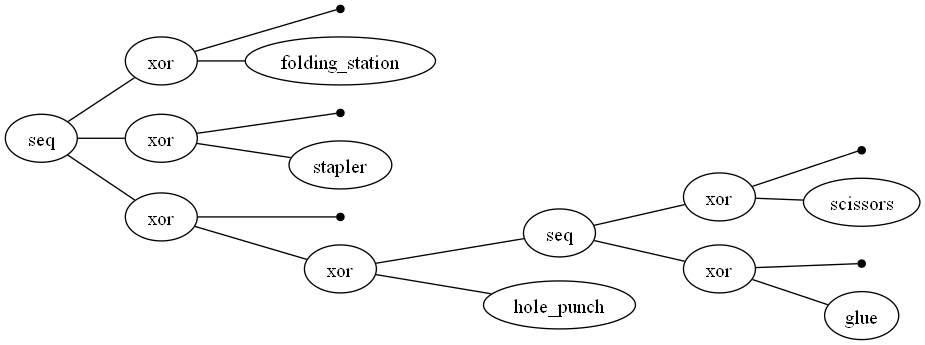

In [8]:
pm4py.view_process_tree(process_tree)

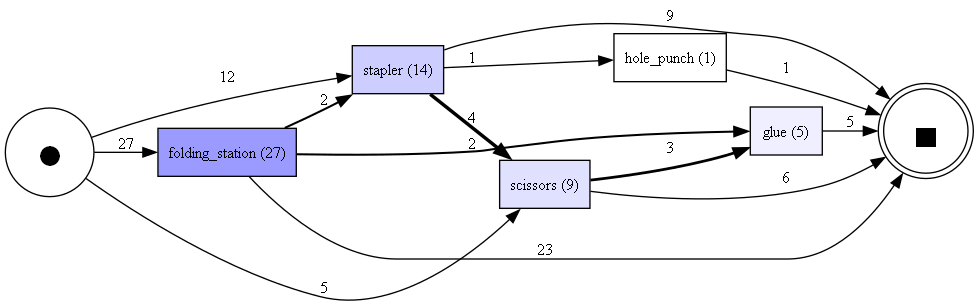

In [9]:
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)

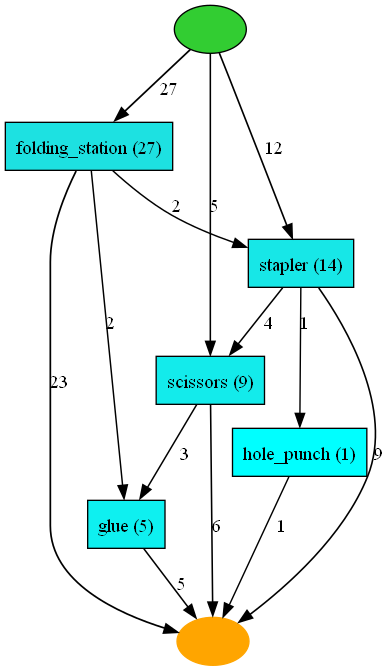

In [10]:
map = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(map)

In [15]:
pm4py.get_variants(df)

{('stapler', 'scissors', 'glue'): 1,
 ('stapler', 'scissors'): 3,
 ('stapler',): 7,
 ('folding_station', 'glue'): 2,
 ('folding_station',): 23,
 ('stapler', 'hole_punch'): 1,
 ('scissors',): 3,
 ('scissors', 'glue'): 2,
 ('folding_station', 'stapler'): 2}

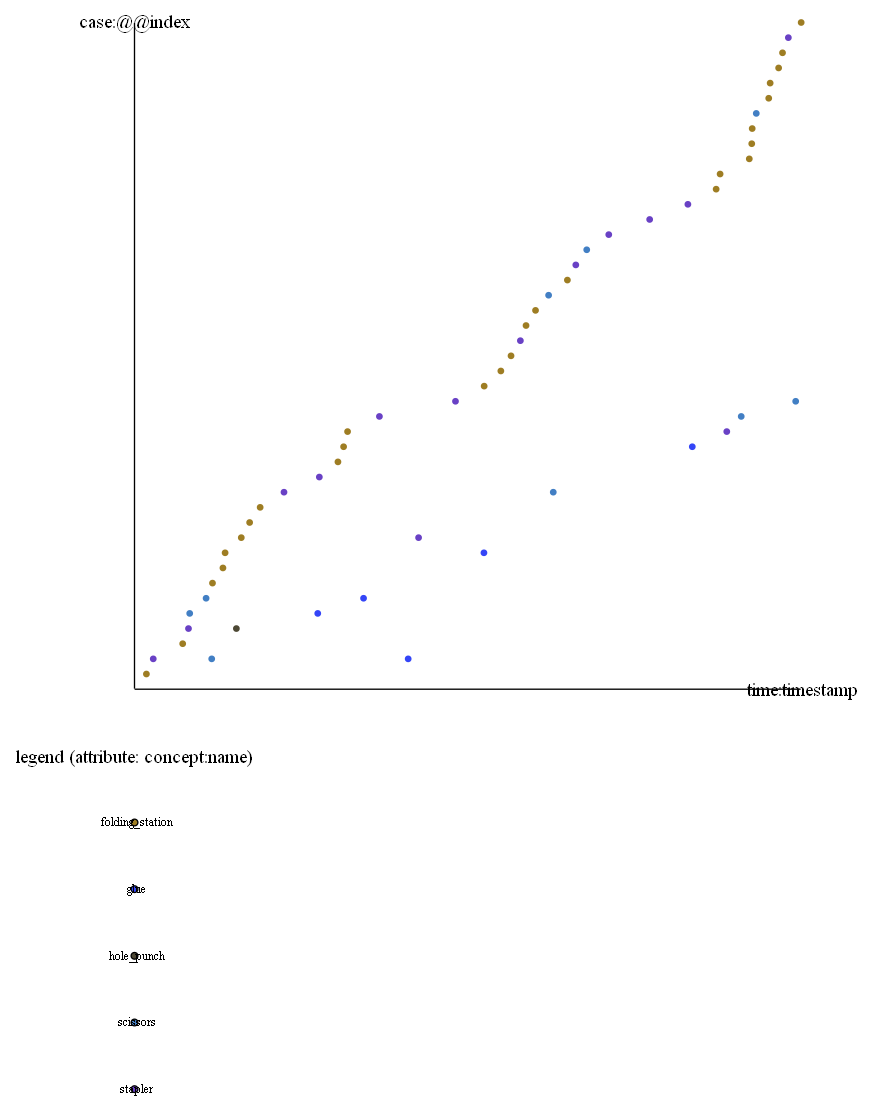

In [20]:
pm4py.view_dotted_chart(df,bgcolor='black')

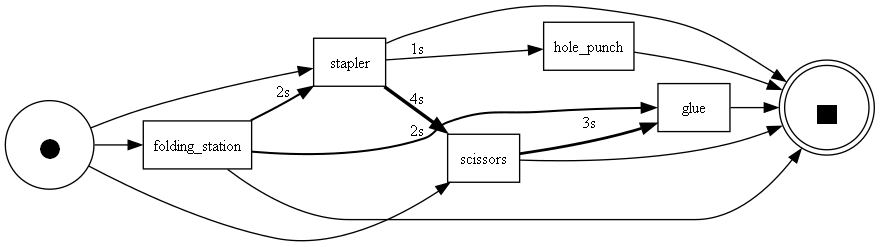

In [23]:
pm4py.view_performance_dfg(dfg,pm4py.get_start_activities(df),pm4py.get_end_activities(df))

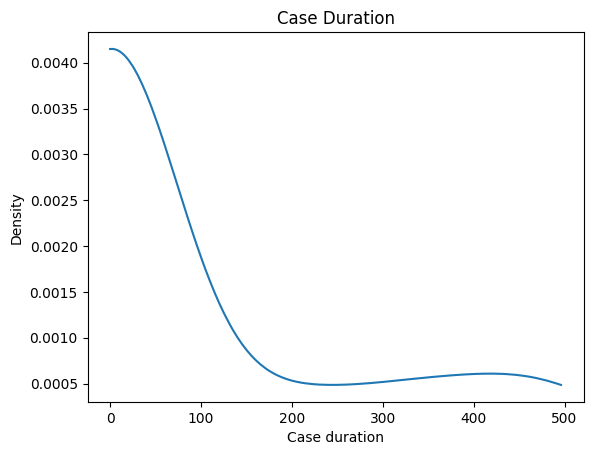

In [24]:
pm4py.view_case_duration_graph(df)

c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\pm4py\algo\discovery\performance_spectrum\variants\dataframe.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[activity_key] = dataframe[activity_key].astype("string")


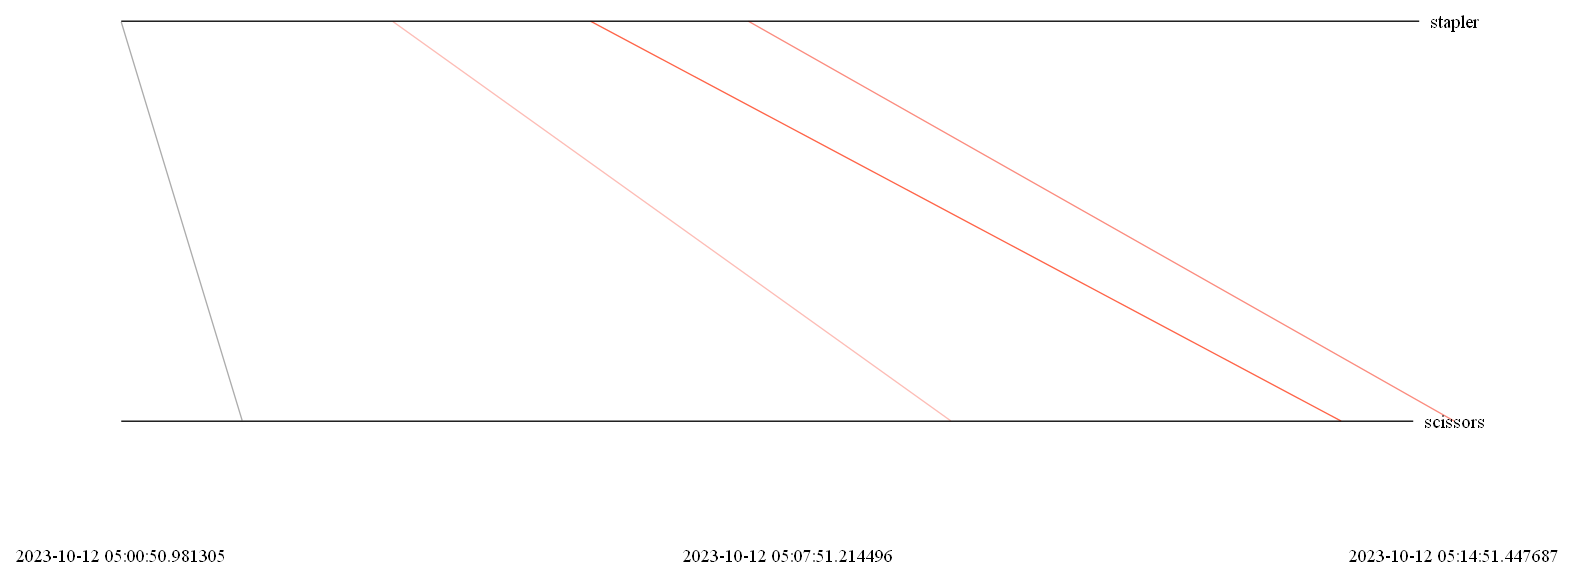

In [28]:
pm4py.view_performance_spectrum(df,activities=['stapler','scissors'])

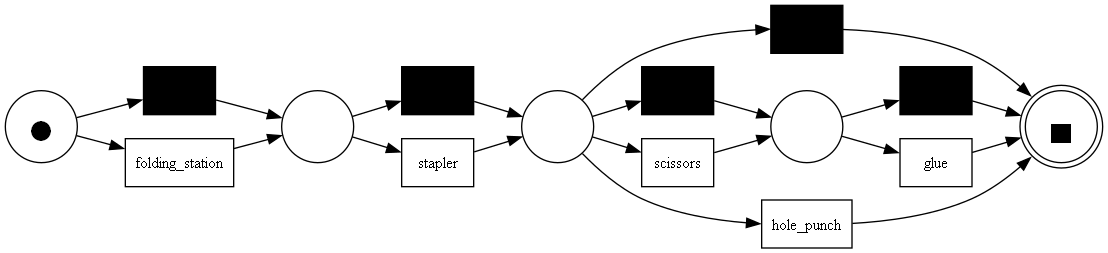

In [33]:
net, im, fm = pm4py.discover_petri_net_inductive(df)
pm4py.view_petri_net(net, im, fm,debug=False)

c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expe

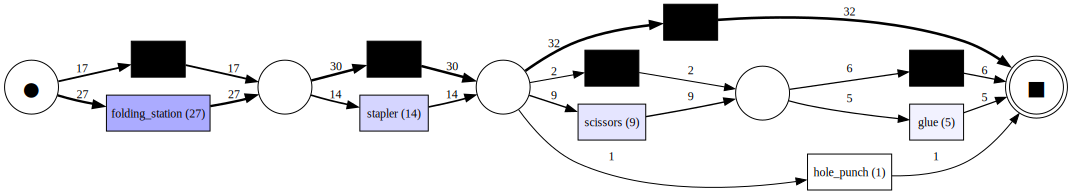

In [39]:
pm4py.visualization.petri_net.visualizer.apply(net,im,fm,
                                               variant=pm4py.visualization.petri_net.variants.token_decoration_frequency,
                                               log=df
                                               )